### 决策边界

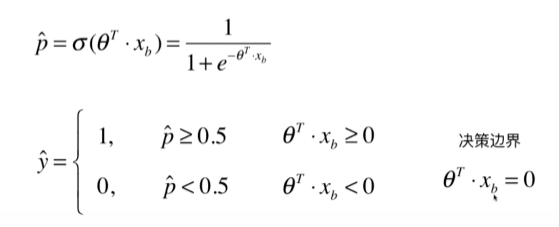
可以表示成一条直线：
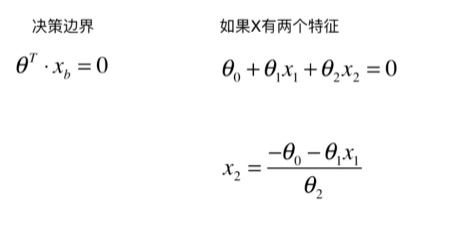

### 数据准备

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

# 只取两种类别，为了可视化的方便，使用两个特征
X = X[y < 2, :2]
y = y[y < 2]

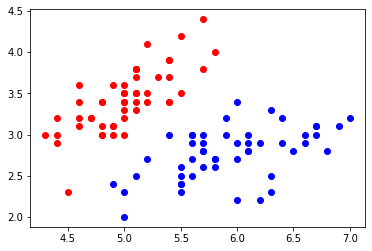

In [2]:
# 横轴和纵轴分别表示两个特征
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red') # 类别1
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue') # 类别2
plt.show()

In [3]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

### 使用逻辑回归

In [4]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [5]:
log_reg.coef_ 

array([ 3.01796521, -5.04447145])

In [6]:
log_reg.intercept_

-0.6937719272911228

In [7]:
# 得到决策边界的函数
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [8]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

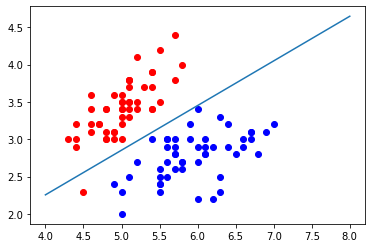

In [9]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()
# 可以看到决策边界大致将数据分为了两类
# 处于决策边界以下的那个红点应该是训练集的。因为对于测试集的分类准确性是100%

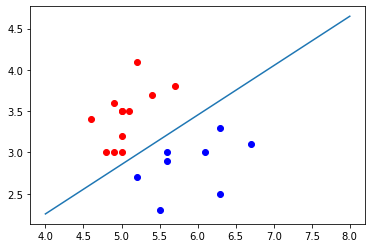

In [10]:
# 对测试数据集进行验证
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

In [12]:
# 绘制模型的决策边界的函数
# model，传入模型
# axis，传入特征的范围
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

<ipython-input-12-577f1565da08>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


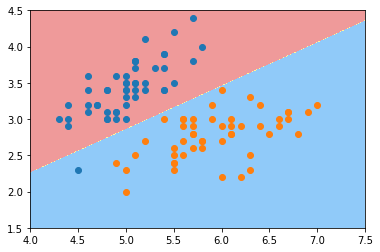

In [13]:
# 绘制逻辑回归的决策边界    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### KNN的决策边界

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
knn_clf.score(X_test, y_test) # 分类准确性100%

1.0

<ipython-input-12-577f1565da08>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


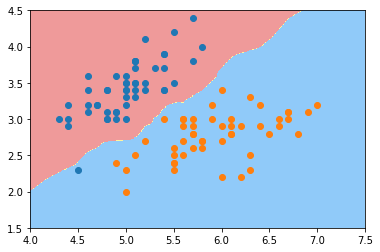

In [16]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [17]:
# 由于KNN天生可以解决多分类问题。绘制下多分类的决策边界
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier()

<ipython-input-12-577f1565da08>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


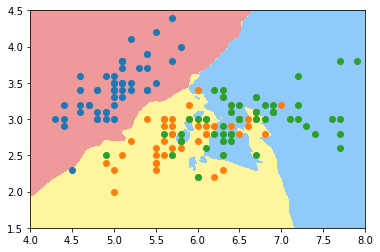

In [18]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show() # 可以看出有过拟合出现
# 对于KNN，k越小，模型越复杂，越容易出现过拟合。故可以通过修改k的值，来提高模型的泛化性

In [19]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50) # 提高k
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(n_neighbors=50)

<ipython-input-12-577f1565da08>:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


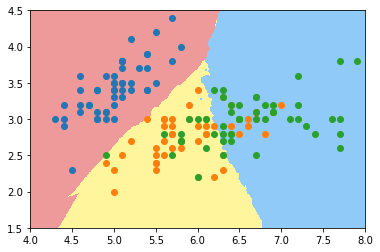

In [21]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()  # 模型复杂度降低